In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Loading the dataset,

rr = pd.read_excel("ratingdata.xlsx")
rr

,Reviews,rating
0,Somewat not satisfied ..but ok on,1
1,Very comfortable,1
2,"Not comfortable , I wanted something soft but ...",1
3,I got my black jeans today. I was really confu...,1
4,Ok ok,1
...,...,...
20179,It is Matt lipstick also creamy. Beautiful nud...,4
20180,Too good and worth it's name LIKE A BOSS,4
20181,Nice natural colour. Can be used like a base o...,4
20182,"Good one, but almost 80% lipstick get transferred",4


In [4]:
# Information summary of the column and its datatype and null count values,

rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20184 entries, 0 to 20183
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  20183 non-null  object
 1   rating   20184 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 315.5+ KB


In [5]:
# we can see there is a null values in reviews column,

rr.isnull().sum()

Reviews    1
rating     0
dtype: int64

In [6]:
# dropping the na values

rr = rr.dropna()
rr = rr.reset_index(drop= True)

In [7]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20183 entries, 0 to 20182
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  20183 non-null  object
 1   rating   20183 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 315.5+ KB


In [8]:
rr['rating'].value_counts()

5    12073
4     4289
1     1634
3     1387
2      800
Name: rating, dtype: int64

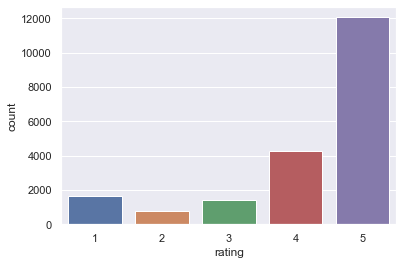

In [9]:
sns.set_theme()
sns.countplot(rr['rating'])
plt.show()

In [10]:
rr['Reviews'].head(30)

0                     Somewat not satisfied ..but ok on
1                                      Very comfortable
2     Not comfortable , I wanted something soft but ...
3     I got my black jeans today. I was really confu...
4                                                 Ok ok
5                                   It just ok not best
6     There was a lot of useless quality. I can't ex...
7                             Good..the quality is good
8     The size issue.. small size is small and mediu...
9     The jeans is not good at all n very uncomforta...
10                                             Very bed
11                The best fitting n material is superb
12    Product is gud nd fitting is not gud somewhat ...
13    Size of I am ordered is 30.it is loose for me....
14    This is an amazing pair of jeans! It's super c...
15    Thanks myntra for this jeans .. and yes it is ...
16    I ordered 28 size because the description says...
17    Awesome product....i ordered wrong size bt

In [11]:
stop_words = stopwords.words("English") # stop words defining

lemmatizer = WordNetLemmatizer() #defining Lemmatizer

In [12]:
rr['Reviews'] = rr['Reviews'].replace('\n','') # replacing \n values 

def clean_Reviews(text):
    
    lower_text = text.lower()  # converting to lower case
    
    text = re.sub(r'[0-9]'," ", text)  # removing numbers
    
    #text = re.sub('W*dw*','',text)   # removing words and digits combination
    
    text = re.sub(r'[^\w\s]', ' ', text)  # removing punctuations
    text = re.sub(r'\_',' ',text)
    
    
   ## clean_words = re.sub(r'[^\x00-\x7f]',r'', text) #Removing all the non-ascii characters 
    
    text = " ".join(text.split()) #Removing the unwanted white spaces
    
    tokenized_text = word_tokenize(text) #Splitting data into words
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [13]:
rr['Reviews'] = rr['Reviews'].apply(clean_Reviews)

In [14]:
rr.to_excel("updated.xlsx",index = False)

In [15]:
rr['Reviews'].head(40)

0                                  Somewat satisfied ok
1                                      Very comfortable
2     Not comfortable I wanted something soft type s...
3     I got black jean today I really confused buyin...
4                                                 Ok ok
5                                            It ok best
6     There lot useless quality I explain There bad ...
7                                     Good quality good
8     The size issue small size small medium size bi...
9                         The jean good n uncomfortable
10                                             Very bed
11                   The best fitting n material superb
12    Product gud nd fitting gud somewhat loose I ex...
13    Size I ordered loose otherwise stich good colo...
14    This amazing pair jean It super comfortable Th...
15    Thanks myntra jean yes jet black jean medium s...
16    I ordered size description say skinny stretcha...
17    Awesome product ordered wrong size bt exch

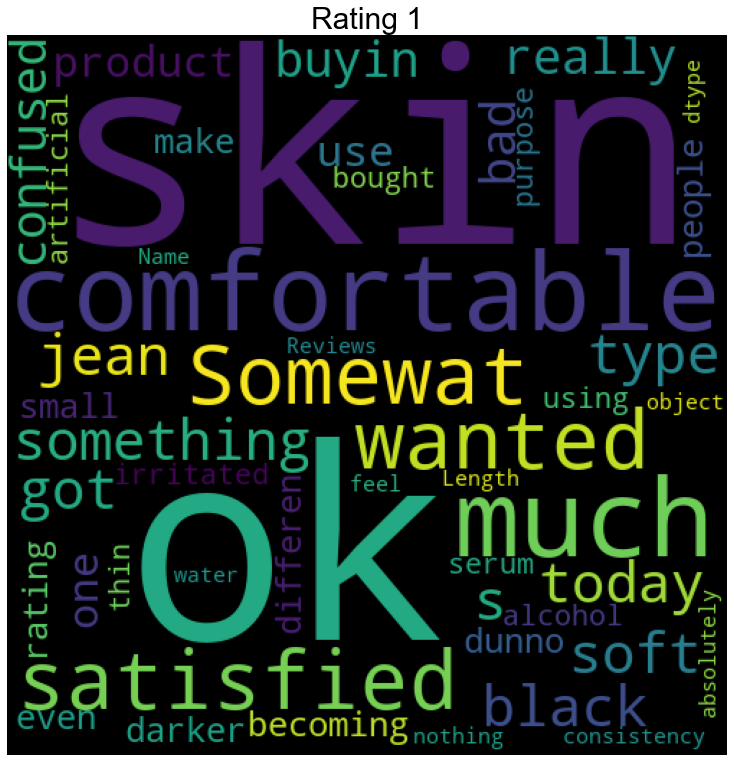

In [16]:
rr_1 = rr[(rr['rating']==1)]

wordcloud = WordCloud(height = 500, width = 500, max_words = 700).generate(str(rr_1['Reviews']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rating 1',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

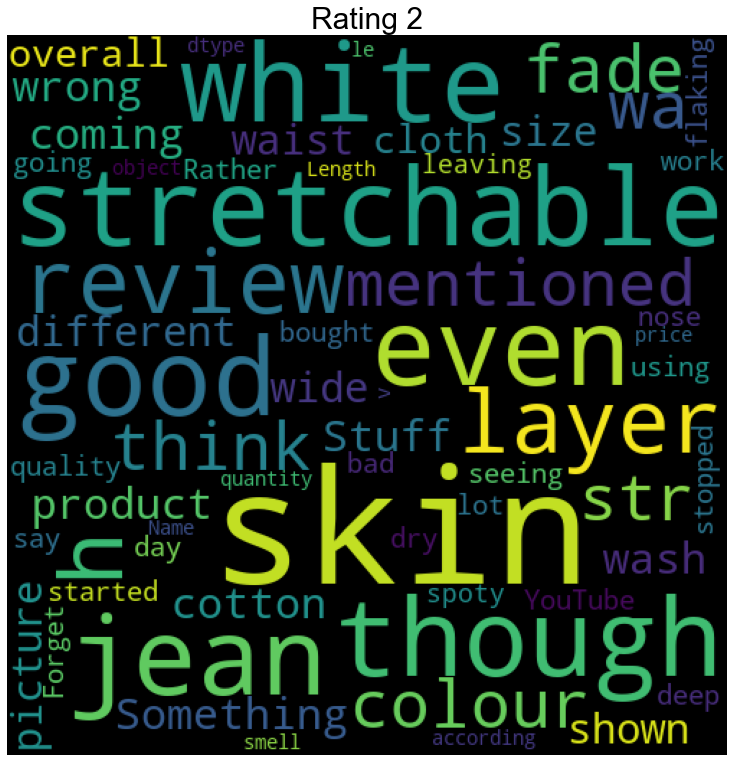

In [17]:
rr_2 = rr[(rr['rating']==2)]

wordcloud = WordCloud(height = 500, width = 500, max_words = 700).generate(str(rr_2['Reviews']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rating 2',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

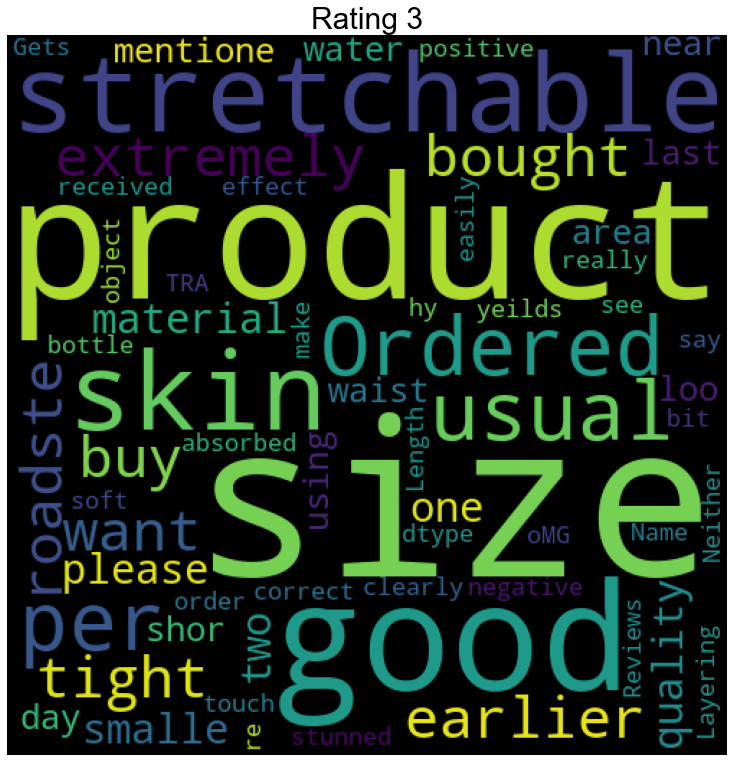

In [18]:
rr_3 = rr[(rr['rating']==3)]

wordcloud = WordCloud(height = 500, width = 500, max_words = 700).generate(str(rr_3['Reviews']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rating 3',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

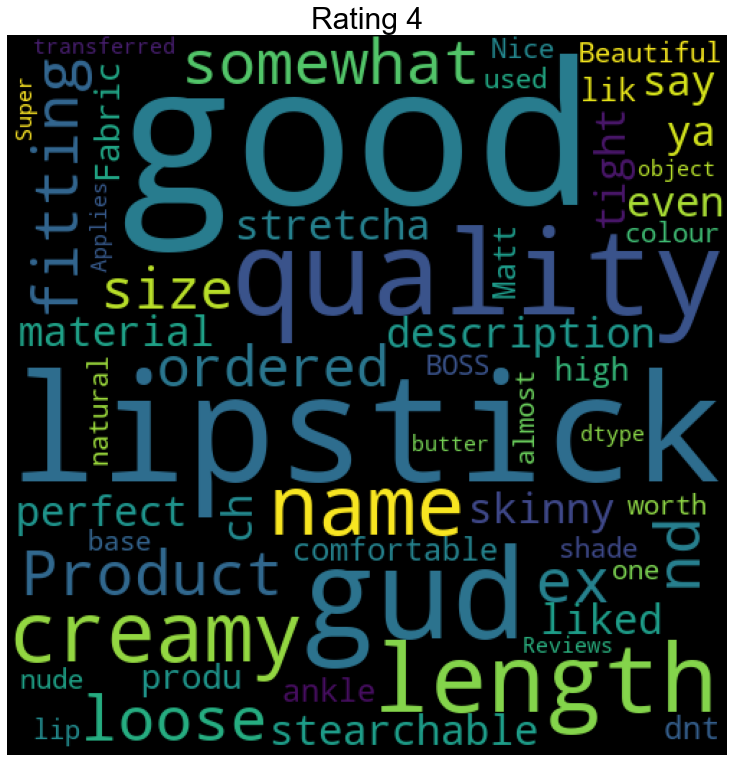

In [19]:
rr_4 = rr[(rr['rating']==4)]

wordcloud = WordCloud(height = 500, width = 500, max_words = 700).generate(str(rr_4['Reviews']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rating 4',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

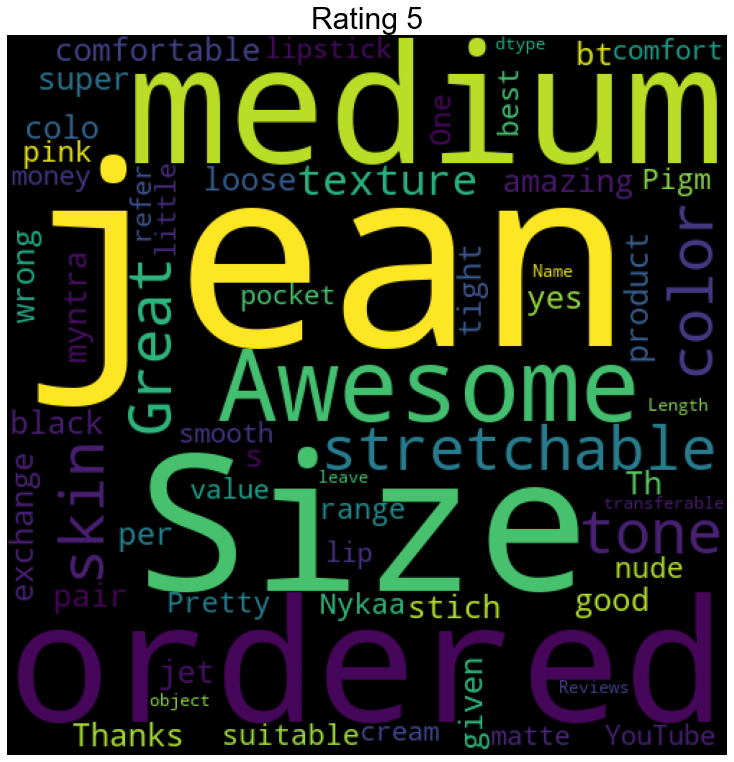

In [20]:
rr_5 = rr[(rr['rating']==5)]

wordcloud = WordCloud(height = 500, width = 500, max_words = 700).generate(str(rr_5['Reviews']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rating 5',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

In [21]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english') # converting features into vectors

In [22]:
#Let's Separate the input and output variables represented by X and y respectively 

X = tf_vec.fit_transform(rr['Reviews'])
y = rr['rating']

<AxesSubplot:xlabel='rating', ylabel='count'>

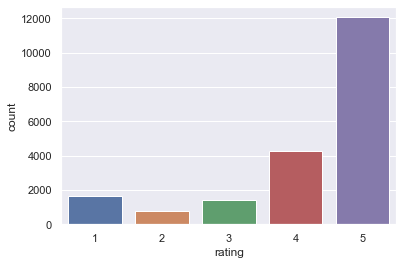

In [23]:
sns.countplot(y)

In [24]:
# using re-sample techinique to imbalance the balanced class,

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

<AxesSubplot:xlabel='rating', ylabel='count'>

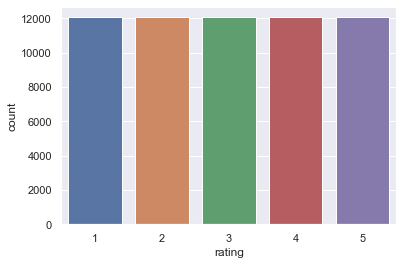

In [25]:
sns.countplot(y_over)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size = 0.20, random_state = 1111)

In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
scr_lor = cross_val_score(lor,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average = 'micro'))
print("CV Score :", scr_lor.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))

F1 score 
 0.6899693531019631
CV Score : 0.640255114718794
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           1       0.77      0.82      0.80      2402
           2       0.76      0.78      0.77      2484
           3       0.63      0.66      0.64      2348
           4       0.59      0.58      0.58      2389
           5       0.69      0.61      0.64      2450

    accuracy                           0.69     12073
   macro avg       0.69      0.69      0.69     12073
weighted avg       0.69      0.69      0.69     12073

--------------------------------------------------------

Confusion Matrix 
 [[1972  212  154   40   24]
 [ 282 1933  186   38   45]
 [ 146  206 1561  332  103]
 [  63   89  355 1377  505]
 [  83   95  237  548 1487]]


In [27]:
#passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)
scr_pac = cross_val_score(pac,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred,average = 'micro'))
print("CV Score :", scr_pac.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))

F1 score 
 0.7368508241530689
CV Score : 0.7004886937795081
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           1       0.88      0.86      0.87      2402
           2       0.75      0.90      0.82      2484
           3       0.73      0.73      0.73      2348
           4       0.64      0.61      0.62      2389
           5       0.68      0.58      0.63      2450

    accuracy                           0.74     12073
   macro avg       0.73      0.74      0.73     12073
weighted avg       0.73      0.74      0.73     12073

--------------------------------------------------------

Confusion Matrix 
 [[2069  173  102   32   26]
 [  89 2230  115   27   23]
 [  47  234 1713  209  145]
 [  62  165  224 1460  478]
 [  88  176  205  557 1424]]


In [31]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)  
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average = 'micro'))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))

F1 score 
 0.7547419862503106
CV Score : 0.7278058477594632
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.86      0.86      2402
           2       0.86      0.88      0.87      2484
           3       0.75      0.80      0.77      2348
           4       0.62      0.66      0.64      2389
           5       0.68      0.58      0.62      2450

    accuracy                           0.75     12073
   macro avg       0.75      0.75      0.75     12073
weighted avg       0.75      0.75      0.75     12073

--------------------------------------------------------

Confusion Matrix 
 [[2074  107   86   67   68]
 [ 106 2182  105   47   44]
 [  80   89 1875  196  108]
 [  63   75  226 1572  453]
 [ 104   75  217  645 1409]]


In [30]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred, average = 'micro'))
print("CV Score :", scr_rfc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))

F1 score 
 0.8757558187691544
CV Score : 0.8284436345564483
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95      2402
           2       0.96      0.96      0.96      2484
           3       0.87      0.91      0.89      2348
           4       0.77      0.80      0.79      2389
           5       0.83      0.74      0.78      2450

    accuracy                           0.88     12073
   macro avg       0.87      0.88      0.87     12073
weighted avg       0.88      0.88      0.87     12073

--------------------------------------------------------

Confusion Matrix 
 [[2310   13   29   27   23]
 [  49 2375   44    9    7]
 [  22   32 2146  118   30]
 [  17   20  121 1920  311]
 [  64   28  118  418 1822]]


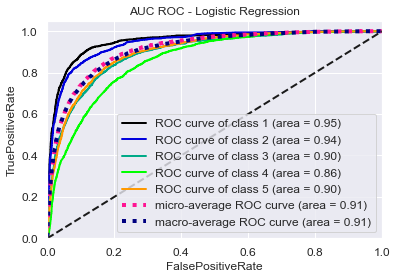

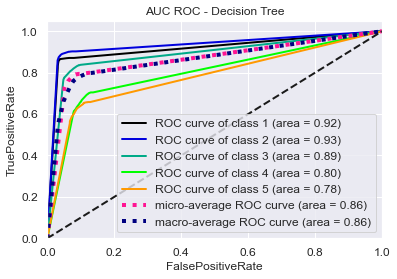

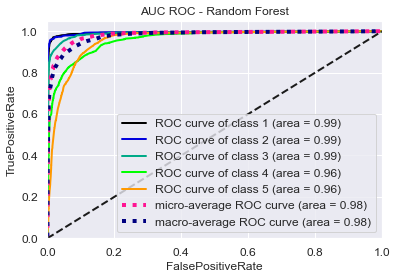

In [42]:
# roc curve for all models

import scikitplot as skplt

probas1 = lor.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas1)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Logistic Regression')
plt.show()


probas3 = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas3)
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Decision Tree')
plt.show()

probas4 = rfc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas4)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Random Forest')
plt.show()



As we can see that out of all models, random forest classifier has high accuracy in terms of cross validation score. 83%. Lets try parameter tuning to the best model,

In [45]:
# applying hyper parameter tuning to the Random forest model.

param = {'n_estimators' : [40,60,80,100] ,'max_depth': [4,8,12,16,20],'criterion' : ['gini','entropy'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

rsc = RandomizedSearchCV(rfc, param_distributions = param, cv= 5)

rsc.fit(x_train,y_train)
rsc.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'entropy'}

In [73]:
final = RandomForestClassifier(n_estimators=100 , criterion = 'entropy', max_depth = 128, 
                               min_samples_leaf =2,min_samples_split =3)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("F1 score \n", f1_score(y_test,pred, average='micro'))
print("Accuracy score \n", accuracy_score(y_test,pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n",confusion_matrix(y_test,pred))

F1 score 
 0.802865899113725
Accuracy score 
 0.8028658991137249
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           1       0.86      0.93      0.90      2402
           2       0.94      0.91      0.92      2484
           3       0.80      0.85      0.82      2348
           4       0.70      0.60      0.65      2389
           5       0.70      0.73      0.71      2450

    accuracy                           0.80     12073
   macro avg       0.80      0.80      0.80     12073
weighted avg       0.80      0.80      0.80     12073

--------------------------------------------------------

Confusion Matrix 
 [[2235   24   60   45   38]
 [ 128 2249   69   23   15]
 [  66   32 1988  164   98]
 [  77   39  216 1431  626]
 [  81   49  159  371 1790]]


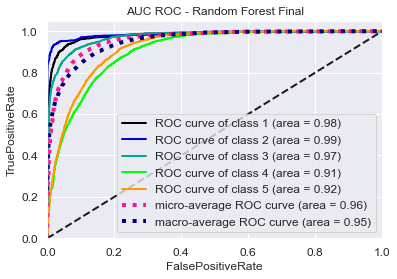

In [74]:
#final model roc curve 

probas4 = final.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas4)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Random Forest Final')
plt.show()


In [75]:
# comparing Actual vs predicted values.

test = pd.DataFrame({'ACtual':y_test,'Predicted': pred})
test.head(25)

,ACtual,Predicted
35771,2,2
4410,5,5
1755,5,3
49342,3,3
29144,1,1
58042,4,4
58077,4,5
28754,1,1
55441,4,4
35665,2,2


In [76]:
# saving the model

import joblib
joblib.dump(final,"rating_review_classifi.pkl")

['rating_review_classifi.pkl']